In [24]:
# Import necessary libraries
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [25]:
# read “moviereviews.tsv” file.
data = pd.read_csv('moviereviews.tsv', delimiter= '\t')
data

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [26]:
# perform operattions to remove symbols, special characters, spaces, numbers
# first we will check if there are NaN values.
data.isnull().sum()

label      0
review    35
dtype: int64

In [27]:
data.dropna(inplace=True)
data

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [28]:
r= 0

blanks = []

for i in data['review']:
    if i.isspace():
        blanks.append(r)
    r=r+1
blanks

[57,
 71,
 146,
 150,
 280,
 304,
 310,
 320,
 339,
 347,
 423,
 496,
 626,
 668,
 803,
 838,
 963,
 1063,
 1278,
 1430,
 1466,
 1498,
 1504,
 1730,
 1818,
 1871,
 1958]

In [29]:
data.drop(blanks, inplace=True)
data

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [30]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())
data['cleaned_data'] = data['review'].apply(clean_data)
data

,label,review,cleaned_data
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...,my first press screening of 1998 and already i...
...,...,...,...
1995,pos,"i like movies with albert brooks , and i reall...",i like movies with albert brooks and i really ...
1996,pos,it might surprise some to know that joel and e...,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...,the verdict spine chilling drama from horror m...
1998,pos,i want to correct what i wrote in a former ret...,i want to correct what i wrote in a former ret...


In [31]:
#drop numbers.
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search(  '\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)
data['cleaned_data'] = data['cleaned_data'].apply(drop_numbers)
data

,label,review,cleaned_data
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...,my first press screening of and already i ve ...
...,...,...,...
1995,pos,"i like movies with albert brooks , and i reall...",i like movies with albert brooks and i really ...
1996,pos,it might surprise some to know that joel and e...,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...,the verdict spine chilling drama from horror m...
1998,pos,i want to correct what i wrote in a former ret...,i want to correct what i wrote in a former ret...


In [32]:
# Convert to lower case
import nltk
nltk.download('punkt')

def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)
data['cleaned_data'] = data['cleaned_data'].apply(lower_case)
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,review,cleaned_data
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...,my first press screening of and already i ve g...
...,...,...,...
1995,pos,"i like movies with albert brooks , and i reall...",i like movies with albert brooks and i really ...
1996,pos,it might surprise some to know that joel and e...,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...,the verdict spine chilling drama from horror m...
1998,pos,i want to correct what i wrote in a former ret...,i want to correct what i wrote in a former ret...


In [33]:
# Lemmetize/stem
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
lemmatizer = WordNetLemmatizer()

def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)
data['cleaned_data'] = data['cleaned_data'].apply(lemmatise)
data

,label,review,cleaned_data
0,neg,how do films like mouse hunt get into theatres...,how do film like mouse hunt get into theatre i...
1,neg,some talented actresses are blessed with a dem...,some talented actress are blessed with a demon...
2,pos,this has been an extraordinary year for austra...,this ha been an extraordinary year for austral...
3,pos,according to hollywood movies made in last few...,according to hollywood movie made in last few ...
4,neg,my first press screening of 1998 and already i...,my first press screening of and already i ve g...
...,...,...,...
1995,pos,"i like movies with albert brooks , and i reall...",i like movie with albert brook and i really li...
1996,pos,it might surprise some to know that joel and e...,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...,the verdict spine chilling drama from horror m...
1998,pos,i want to correct what i wrote in a former ret...,i want to correct what i wrote in a former ret...


In [35]:
# remove stop words
nltk.download('stopwords')

stopworrds = set(stopwords.words('english'))
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in stopworrds]
    tokens_text = ' '.join(tokens)
    return tokens_text
data['cleaned_data'] = data['cleaned_data'].apply(remove_stopword)
data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,review,cleaned_data
0,neg,how do films like mouse hunt get into theatres...,film like mouse hunt get theatre law something...
1,neg,some talented actresses are blessed with a dem...,talented actress blessed demonstrated wide act...
2,pos,this has been an extraordinary year for austra...,ha extraordinary year australian film shine ha...
3,pos,according to hollywood movies made in last few...,according hollywood movie made last decade lif...
4,neg,my first press screening of 1998 and already i...,first press screening already gotten prime can...
...,...,...,...
1995,pos,"i like movies with albert brooks , and i reall...",like movie albert brook really like movie dire...
1996,pos,it might surprise some to know that joel and e...,might surprise know joel ethan coen brought un...
1997,pos,the verdict : spine-chilling drama from horror...,verdict spine chilling drama horror maestro st...
1998,pos,i want to correct what i wrote in a former ret...,want correct wrote former retrospective david ...


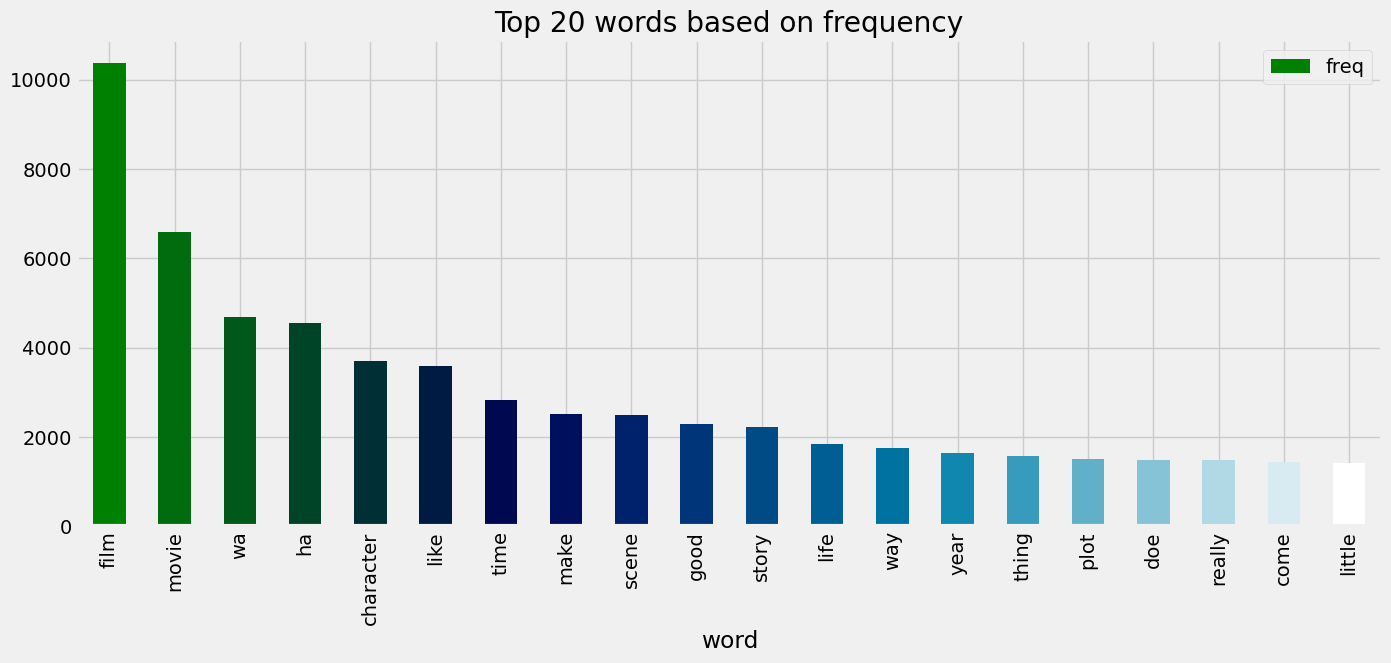

In [36]:
# visualize the Most Frequent Words.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer(stop_words= 'english')
words = cv.fit_transform(data.cleaned_data)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color= color)
plt.title('Top 20 words based on frequency')
plt.show()

In [43]:
#Perform a random split based on 70/30.
from sklearn.model_selection import train_test_split

X = data['cleaned_data']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier      # ChatGPT helped us in this part because it kept throwing errors.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Assume you have your features X and corresponding labels y
X = data['cleaned_data']
y = data['label']

# Perform random split with a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Convert Series to arrays and reshape
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical features in X_train
X_train_encoded = encoder.fit_transform(X_train)

# Transform the categorical features in X_test
X_test_encoded = encoder.transform(X_test)

# Create an instance of the Random Forest Classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train_encoded, y_train)

# Predict labels for the test set
y_pred = classifier.predict(X_test_encoded)

# Measure the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.47594501718213056
